<a href="https://colab.research.google.com/github/kjirawat/hua_ml/blob/main/As2_Stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Assignment 2 Stock Forecast

https://www.ultimatepython.co/post/python-yahoo-finance

In [140]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [141]:
import yfinance as yf

In [142]:
# ptt = yf.Ticker('ptt.bk')
ptt = yf.Ticker('AAPL')
interval = '1h'
start = '2023-9-1'
end = '2023-10-31'
ptt_price_df = ptt.history(interval=interval,start=start,end=end)
ptt_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-01 09:30:00-04:00,189.485001,189.919998,188.279999,189.279999,12242102,0.0,0.0
2023-09-01 10:30:00-04:00,189.270004,189.279999,188.311005,188.660004,5217745,0.0,0.0
2023-09-01 11:30:00-04:00,188.679993,189.210007,188.360107,189.115005,4230174,0.0,0.0
2023-09-01 12:30:00-04:00,189.110001,189.320007,188.839996,189.000000,3233746,0.0,0.0
2023-09-01 13:30:00-04:00,188.990005,189.225006,188.630005,188.720093,3052530,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-30 11:30:00-04:00,169.669998,170.160004,169.410004,169.466095,3707282,0.0,0.0
2023-10-30 12:30:00-04:00,169.464996,170.050003,169.050003,169.919907,4478492,0.0,0.0
2023-10-30 13:30:00-04:00,169.919998,170.490005,169.880005,170.360001,4232265,0.0,0.0


Follow the steps from https://blog.quantinsti.com/machine-learning-logistic-regression-python/

In [143]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4564    0  4564    0     0  11822      0 --:--:-- --:--:-- --:--:-- 11823
100  517k  100  517k    0     0   508k      0  0:00:01  0:00:01 --:--:--  508k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4592    0  4592    0     0  11750      0 --:--:-- --:--:-- --:--:-- 11744
100  392k  100  392k    0     0   391k      0  0:00:01  0:00:01 --:--:--  391k


In [144]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split

In [145]:
ptt_price_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-01 09:30:00-04:00,189.485001,189.919998,188.279999,189.279999,12242102,0.0,0.0
2023-09-01 10:30:00-04:00,189.270004,189.279999,188.311005,188.660004,5217745,0.0,0.0
2023-09-01 11:30:00-04:00,188.679993,189.210007,188.360107,189.115005,4230174,0.0,0.0
2023-09-01 12:30:00-04:00,189.110001,189.320007,188.839996,189.000000,3233746,0.0,0.0
2023-09-01 13:30:00-04:00,188.990005,189.225006,188.630005,188.720093,3052530,0.0,0.0


In [146]:
# df = ptt_price_df
df = ptt_price_df.iloc[:,0:4]
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
#X = df.iloc[:,0:4,5:9]


In [147]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-09-06 13:30:00-04:00,182.910004,183.169998,182.130005,182.634293,186.484520,0.853759,17.629752,-0.005402,-0.300003
2023-09-06 14:30:00-04:00,182.634995,182.899994,181.470001,181.520004,185.677791,0.857255,15.077179,0.000702,-0.275009
2023-09-06 15:30:00-04:00,181.529999,183.020004,181.490005,182.889999,185.043791,0.797858,29.100587,0.009995,-1.104996
2023-09-07 09:30:00-04:00,175.179993,177.719894,173.679993,176.250000,183.684792,0.870538,15.403051,-7.710007,-6.350006
2023-09-07 10:30:00-04:00,176.089996,178.210007,175.729996,177.330002,182.463011,0.885027,22.035185,-0.160004,0.910004
...,...,...,...,...,...,...,...,...,...
2023-10-30 11:30:00-04:00,169.669998,170.160004,169.410004,169.466095,168.432611,0.893429,54.912485,0.000000,0.290100
2023-10-30 12:30:00-04:00,169.464996,170.050003,169.050003,169.919907,168.608601,0.949626,58.418806,-0.001099,-0.205002
2023-10-30 13:30:00-04:00,169.919998,170.490005,169.880005,170.360001,168.771101,0.966649,61.633741,0.000092,0.455002


In [148]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
print(len(X))
print(len(y))
y_df=pd.DataFrame(y)
y_df.head()

269
269


,0
0,-1
1,1
2,-1
3,1
4,-1


###Split The Dataset

In [149]:
split = int(0.7*len(df))
# X_train,X_test=train_test_split(df,test_size=0.7,random_state=0,stratify=df['Close'])
# Y_train,Y_test=train_test_split(y_df,test_size=0.7,random_state=0,stratify=y_df[0])
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(len(X_train))
print(len(X_test))

188
81


In [150]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

In [151]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.7847734033244949]
1,High,[0.703578603981312]
2,Low,[0.18209434600535257]
3,Close,[-0.17768779540564894]
4,S_10,[0.07078240859306635]
5,Corr,[-0.22186505014237168]
6,RSI,[0.0162123618735303]
7,Open-Close,[-0.13445481684855556]
8,Open-Open,[-0.1977318646828472]


In [152]:
# Specify the date for prediction
prediction_date = '2023-9-30'
probability = model.predict_proba(X_test)
print(probability)
print(len(probability))

[[0.5112528  0.4887472 ]
 [0.32668045 0.67331955]
 [0.5383436  0.4616564 ]
 [0.55693604 0.44306396]
 [0.19988403 0.80011597]
 [0.59503214 0.40496786]
 [0.61478624 0.38521376]
 [0.6128528  0.3871472 ]
 [0.4565017  0.5434983 ]
 [0.51843424 0.48156576]
 [0.59788277 0.40211723]
 [0.46094816 0.53905184]
 [0.47887925 0.52112075]
 [0.42335098 0.57664902]
 [0.61632766 0.38367234]
 [0.54889466 0.45110534]
 [0.55460894 0.44539106]
 [0.51962077 0.48037923]
 [0.21886321 0.78113679]
 [0.60670035 0.39329965]
 [0.46452033 0.53547967]
 [0.54018842 0.45981158]
 [0.65131055 0.34868945]
 [0.58617608 0.41382392]
 [0.58877322 0.41122678]
 [0.42168674 0.57831326]
 [0.53826624 0.46173376]
 [0.38565663 0.61434337]
 [0.44668254 0.55331746]
 [0.6434019  0.3565981 ]
 [0.55224981 0.44775019]
 [0.5073269  0.4926731 ]
 [0.60318275 0.39681725]
 [0.61979549 0.38020451]
 [0.42015209 0.57984791]
 [0.46381335 0.53618665]
 [0.63051698 0.36948302]
 [0.55689634 0.44310366]
 [0.6162668  0.3837332 ]
 [0.53572588 0.46427412]


In [153]:
predicted = model.predict(X_test)
print(predicted)
print(len(predicted))

[-1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1
 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1
  1 -1  1  1 -1  1 -1 -1  1]
81


In [154]:
# Find the dates with predicted buy signals (Signal = 1)
predicted_labels = model.predict(X_test)
idx = df.index[split:]

buy_signal_dates = idx[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2023-10-13 13:30:00-04:00', '2023-10-16 09:30:00-04:00',
               '2023-10-16 13:30:00-04:00', '2023-10-17 09:30:00-04:00',
               '2023-10-17 10:30:00-04:00', '2023-10-17 11:30:00-04:00',
               '2023-10-18 09:30:00-04:00', '2023-10-18 11:30:00-04:00',
               '2023-10-19 09:30:00-04:00', '2023-10-19 11:30:00-04:00',
               '2023-10-19 12:30:00-04:00', '2023-10-20 11:30:00-04:00',
               '2023-10-20 12:30:00-04:00', '2023-10-23 10:30:00-04:00',
               '2023-10-23 12:30:00-04:00', '2023-10-24 11:30:00-04:00',
               '2023-10-24 14:30:00-04:00', '2023-10-25 09:30:00-04:00',
               '2023-10-25 10:30:00-04:00', '2023-10-26 09:30:00-04:00',
               '2023-10-26 11:30:00-04:00', '2023-10-26 13:30:00-04:00',
               '2023-10-27 09:30:00-04:00', '2023-10-27 12:30:00-04:00',
               '2023-10-27 13:30:00-04:00', '2023-10-27 14:30:00-04:00',
               '2023-1

In [155]:
print(metrics.confusion_matrix(y_test, predicted))

[[34 10]
 [17 20]]


In [156]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.67      0.77      0.72        44
           1       0.67      0.54      0.60        37

    accuracy                           0.67        81
   macro avg       0.67      0.66      0.66        81
weighted avg       0.67      0.67      0.66        81



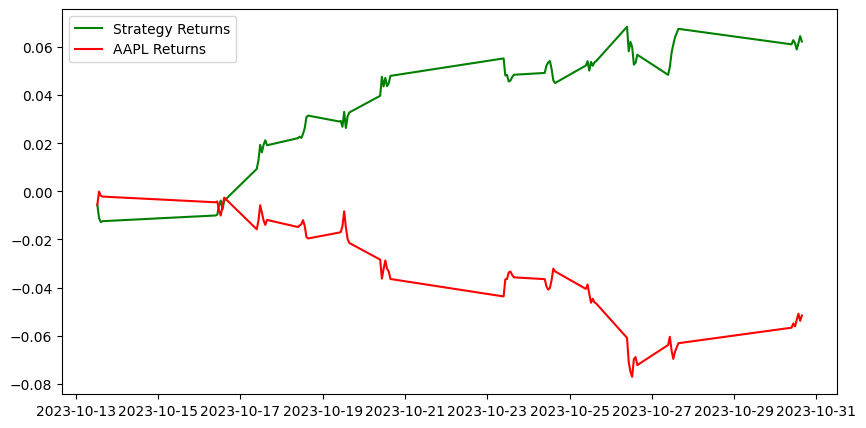

In [157]:
df['Predicted_Signal'] = model.predict(X)
df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_AAPL_returns = np.cumsum(df[split:]['AAPL_returns'])


df['Strategy_returns'] = df['AAPL_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_AAPL_returns, color='r', label = 'AAPL Returns')
plt.legend()
plt.show()

In [158]:
# ptt = yf.Ticker('ptt.bk')
meta = yf.Ticker('META')
interval = '1h'
start = '2023-9-1'
end = '2023-10-31'
meta_price_df = meta.history(interval=interval,start=start,end=end)
meta_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-01 09:30:00-04:00,299.040009,301.739990,295.591003,298.730011,3816113,0.0,0.0
2023-09-01 10:30:00-04:00,298.720001,298.720001,295.350006,296.834991,1817347,0.0,0.0
2023-09-01 11:30:00-04:00,296.829987,297.179993,294.470001,295.501007,1477485,0.0,0.0
2023-09-01 12:30:00-04:00,295.500000,297.269989,294.890015,296.149994,1357568,0.0,0.0
2023-09-01 13:30:00-04:00,296.100006,296.730011,295.329987,295.489990,758702,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-30 11:30:00-04:00,303.820007,304.619995,302.269989,302.406006,2518142,0.0,0.0
2023-10-30 12:30:00-04:00,302.364990,304.200195,301.059998,303.829987,2149673,0.0,0.0
2023-10-30 13:30:00-04:00,303.807007,305.000000,302.820007,302.962097,2652594,0.0,0.0


In [159]:
newdf = pd.merge(df.iloc[:,:4],meta_price_df.iloc[:,1:2],how="inner",left_index=True,right_index=True)
newdf

,Open,High_x,Low,Close,High_y
Datetime,,,,,
2023-09-06 13:30:00-04:00,182.910004,183.169998,182.130005,182.634293,298.079987
2023-09-06 14:30:00-04:00,182.634995,182.899994,181.470001,181.520004,299.100006
2023-09-06 15:30:00-04:00,181.529999,183.020004,181.490005,182.889999,299.399994
2023-09-07 09:30:00-04:00,175.179993,177.719894,173.679993,176.250000,304.720001
2023-09-07 10:30:00-04:00,176.089996,178.210007,175.729996,177.330002,307.049896
...,...,...,...,...,...
2023-10-30 11:30:00-04:00,169.669998,170.160004,169.410004,169.466095,304.619995
2023-10-30 12:30:00-04:00,169.464996,170.050003,169.050003,169.919907,304.200195
2023-10-30 13:30:00-04:00,169.919998,170.490005,169.880005,170.360001,305.000000


In [160]:
newdf.columns

Index(['Open', 'High_x', 'Low', 'Close', 'High_y'], dtype='object')

In [161]:
# newdf = ptt_price_df.iloc[:,0:4]
newdf['S_10'] = newdf['Close'].rolling(window=10).mean()
newdf['Corr'] = newdf['Close'].rolling(window=10).corr(newdf['S_10'])
newdf['RSI'] = ta.RSI(np.array(newdf['Close']), timeperiod =10)
newdf['Open-Close'] = newdf['Open'] - newdf['Close'].shift(1)
newdf['Open-Open'] = newdf['Open'] - newdf['Open'].shift(1)
newdf = newdf.dropna()
# X = newdf.iloc[:,:9]
#X = df.iloc[:,0:4,5:9]
newdf


,Open,High_x,Low,Close,High_y,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,
2023-09-11 10:30:00-04:00,177.899994,178.949997,177.339996,178.750000,305.420013,178.769200,-0.716063,40.472716,0.009995,-2.167709
2023-09-11 11:30:00-04:00,178.750000,178.860001,178.210098,178.684998,305.209991,178.881700,-0.625813,40.143043,0.000000,0.850006
2023-09-11 12:30:00-04:00,178.689102,179.302399,178.330002,179.264999,305.100006,178.855701,-0.478903,44.615698,0.004105,-0.060898
2023-09-11 13:30:00-04:00,179.270004,179.550003,179.009995,179.514999,308.959991,178.826021,-0.237033,46.529229,0.005005,0.580902
2023-09-11 14:30:00-04:00,179.514999,179.929993,179.360001,179.695007,308.170013,178.840022,0.172608,47.967474,0.000000,0.244995
...,...,...,...,...,...,...,...,...,...,...
2023-10-30 11:30:00-04:00,169.669998,170.160004,169.410004,169.466095,304.619995,168.432611,0.893429,54.912485,0.000000,0.290100
2023-10-30 12:30:00-04:00,169.464996,170.050003,169.050003,169.919907,304.200195,168.608601,0.949626,58.418806,-0.001099,-0.205002
2023-10-30 13:30:00-04:00,169.919998,170.490005,169.880005,170.360001,305.000000,168.771101,0.966649,61.633741,0.000092,0.455002


In [162]:
newX = newdf.copy()
newy = np.where(newdf['Close'].shift(-1) > newdf['Close'],1,-1)
print(len(newX))
print(len(newy))
newy_df=pd.DataFrame(newy)
newy_df.head()

251
251


,0
0,-1
1,1
2,1
3,1
4,-1


In [163]:
split = int(0.7*len(newdf))
# X_train,X_test=train_test_split(df,test_size=0.7,random_state=0,stratify=df['Close'])
# Y_train,Y_test=train_test_split(y_df,test_size=0.7,random_state=0,stratify=y_df[0])
newX_train, newX_test, newy_train, newy_test = newX[:split], newX[split:], newy[:split], newy[split:]
print(len(newX_train))
print(len(newX_test))

newmodel = LogisticRegression(max_iter=1000)
newmodel = newmodel.fit (newX_train,newy_train)

175
76


In [164]:
pd.DataFrame(zip(newX.columns, np.transpose(newmodel.coef_)))

,0,1
0,Open,[-0.9579135221430354]
1,High_x,[0.5426526983572382]
2,Low,[0.15822975939788542]
3,Close,[-0.024620998697098512]
4,High_y,[0.05942496420348487]
5,S_10,[0.17328200628080853]
6,Corr,[-0.10136331282436958]
7,RSI,[0.00986936213802429]
8,Open-Close,[-0.5526789895376845]
9,Open-Open,[-0.11329649749589932]


In [165]:
newprobability = newmodel.predict_proba(newX_test)
print(newprobability)
print(len(newprobability))

[[0.42067147 0.57932853]
 [0.4817381  0.5182619 ]
 [0.43948122 0.56051878]
 [0.27259298 0.72740702]
 [0.34686431 0.65313569]
 [0.45986531 0.54013469]
 [0.13633396 0.86366604]
 [0.22968617 0.77031383]
 [0.21316742 0.78683258]
 [0.43210646 0.56789354]
 [0.38162649 0.61837351]
 [0.35564897 0.64435103]
 [0.28242823 0.71757177]
 [0.04374387 0.95625613]
 [0.36291655 0.63708345]
 [0.29170525 0.70829475]
 [0.3260527  0.6739473 ]
 [0.45265486 0.54734514]
 [0.42577639 0.57422361]
 [0.40181052 0.59818948]
 [0.26123251 0.73876749]
 [0.35431259 0.64568741]
 [0.25362395 0.74637605]
 [0.3118264  0.6881736 ]
 [0.59798558 0.40201442]
 [0.50026884 0.49973116]
 [0.41965795 0.58034205]
 [0.45122926 0.54877074]
 [0.50481183 0.49518817]
 [0.25238178 0.74761822]
 [0.28162396 0.71837604]
 [0.46521487 0.53478513]
 [0.40615789 0.59384211]
 [0.47297975 0.52702025]
 [0.19894555 0.80105445]
 [0.19875266 0.80124734]
 [0.4008868  0.5991132 ]
 [0.27497392 0.72502608]
 [0.31578619 0.68421381]
 [0.3647552  0.6352448 ]


In [166]:
newpredicted = newmodel.predict(newX_test)
print(newpredicted)
print(len(newpredicted))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1]
76


In [167]:
# Find the dates with predicted buy signals (Signal = 1)
newpredicted_labels = newmodel.predict(newX_test)
newidx = newdf.index[split:]

newbuy_signal_dates = newidx[newpredicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(newbuy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2023-10-16 10:30:00-04:00', '2023-10-16 11:30:00-04:00',
               '2023-10-16 12:30:00-04:00', '2023-10-16 13:30:00-04:00',
               '2023-10-16 14:30:00-04:00', '2023-10-16 15:30:00-04:00',
               '2023-10-17 09:30:00-04:00', '2023-10-17 10:30:00-04:00',
               '2023-10-17 11:30:00-04:00', '2023-10-17 12:30:00-04:00',
               '2023-10-17 13:30:00-04:00', '2023-10-17 14:30:00-04:00',
               '2023-10-17 15:30:00-04:00', '2023-10-18 09:30:00-04:00',
               '2023-10-18 10:30:00-04:00', '2023-10-18 11:30:00-04:00',
               '2023-10-18 12:30:00-04:00', '2023-10-18 13:30:00-04:00',
               '2023-10-18 14:30:00-04:00', '2023-10-18 15:30:00-04:00',
               '2023-10-19 09:30:00-04:00', '2023-10-19 10:30:00-04:00',
               '2023-10-19 11:30:00-04:00', '2023-10-19 12:30:00-04:00',
               '2023-10-19 15:30:00-04:00', '2023-10-20 09:30:00-04:00',
               '2023-1

In [168]:
print(metrics.confusion_matrix(newy_test, newpredicted))

print(metrics.classification_report(newy_test, newpredicted))

[[ 7 34]
 [ 3 32]]
              precision    recall  f1-score   support

          -1       0.70      0.17      0.27        41
           1       0.48      0.91      0.63        35

    accuracy                           0.51        76
   macro avg       0.59      0.54      0.45        76
weighted avg       0.60      0.51      0.44        76



In [169]:
newdf['Predicted_Signal'] = newmodel.predict(newX)
newdf['AAPL_returns'] = np.log(newdf['Close']/newdf['Close'].shift(1))
newCumulative_AAPL_returns = np.cumsum(newdf[split:]['AAPL_returns'])

newdf['Strategy_returns'] = newdf['AAPL_returns']* newdf['Predicted_Signal'].shift(1)
newCumulative_Strategy_returns = np.cumsum(newdf[split:]['Strategy_returns'])


<ipython-input-169-6a3cc1388888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Predicted_Signal'] = newmodel.predict(newX)
<ipython-input-169-6a3cc1388888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['AAPL_returns'] = np.log(newdf['Close']/newdf['Close'].shift(1))
<ipython-input-169-6a3cc1388888>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

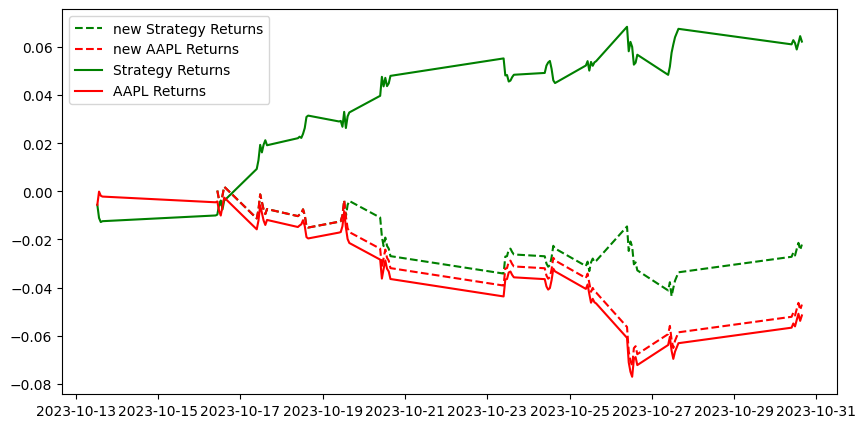

In [170]:
plt.figure(figsize=(10,5))
plt.plot(newCumulative_Strategy_returns, color='g', label='new Strategy Returns',linestyle='--')
plt.plot(newCumulative_AAPL_returns, color='r', label='new AAPL Returns',linestyle='--')

plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_AAPL_returns, color='r', label = 'AAPL Returns')
plt.legend()
plt.show()